# 1.0 Upload Datei

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TravelTide_SQL_excerpt_for_EDA_unsupervised.xlsx to TravelTide_SQL_excerpt_for_EDA_unsupervised.xlsx


# 1.1 Import Libraries + Check Table

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Upload Datei + Anzeigen der ersten 5 Zeilen
df = pd.read_excel('TravelTide_SQL_excerpt_for_EDA_unsupervised.xlsx')
df.head()

,user_id,age,gender,is_married,has_children,home_country,home_city,home_airport_lat,home_airport_lon,account_age_days,...,num_flights,avg_seats_per_trip,avg_base_fare,avg_checked_bags,return_flight_ratio,avg_trip_distance,num_hotel_stays,avg_nights,avg_rooms,avg_price_per_room
0,0,35,F,0,0,usa,minneapolis,44.880,-93.217,1526,...,1.0,1.0,205.16,0.0,1.0,12.502919,1.0,4.0,1.0,130.0
1,1,24,M,0,0,usa,colorado springs,38.806,-104.700,1526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,32,M,0,0,usa,portland,45.589,-122.597,1526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,28,F,0,0,usa,houston,29.980,-95.340,1526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,47,M,1,1,usa,honolulu,21.316,-157.927,1526,...,1.0,1.0,1284.75,1.0,1.0,81.728357,1.0,2.0,1.0,81.0


# 2.0 Checking Missing Values and Types

In [ ]:
print("Typen pro Spalte:")
print(df.dtypes)
print("Fehlende Werte pro Spalte:")
print(df.isnull().sum())

Typen pro Spalte:
user_id                       int64
age                           int64
gender                       object
is_married                    int64
has_children                  int64
home_country                 object
home_city                    object
home_airport_lat            float64
home_airport_lon            float64
account_age_days              int64
session_count               float64
avg_page_clicks             float64
avg_session_duration_min    float64
flight_booking_rate         float64
hotel_booking_rate          float64
cancellation_rate           float64
avg_flight_discount         float64
avg_hotel_discount          float64
num_flights                 float64
avg_seats_per_trip          float64
avg_base_fare               float64
avg_checked_bags            float64
return_flight_ratio         float64
avg_trip_distance           float64
num_hotel_stays             float64
avg_nights                  float64
avg_rooms                   float64
avg_price_

# 2.1 Handle Missing Values

In [ ]:
# Liste der Spalten mit Session-bezogenen Features
session_cols = [
    'session_count', 'avg_page_clicks', 'avg_session_duration_min',
    'flight_booking_rate', 'hotel_booking_rate', 'cancellation_rate'
]

# Fehlende Werte in den Session-Features durch 0 ersetzen
# → z. B. bei Nutzern ohne gültige Sessions im Zeitraum
df[session_cols] = df[session_cols].fillna(0)


In [ ]:
# Kein Rabatt jemals genutzt = 0
df['avg_flight_discount'] = df['avg_flight_discount'].fillna(0)
df['avg_hotel_discount'] = df['avg_hotel_discount'].fillna(0)


In [ ]:
# Liste der Spalten mit Flug-bezogenen Features
flight_cols = [
    'num_flights', 'avg_seats_per_trip', 'avg_base_fare',
    'avg_checked_bags', 'return_flight_ratio', 'avg_trip_distance'
]

# Fehlende Werte in den Flug-Features durch 0 ersetzen
# → z. B. bei Nutzern, die keine Flüge gebucht haben
df[flight_cols] = df[flight_cols].fillna(0)


In [ ]:
# Liste der Spalten mit Hotel-bezogenen Features
hotel_cols = [
    'num_hotel_stays', 'avg_nights', 'avg_rooms', 'avg_price_per_room'
]

# Fehlende Werte in den Hotel-Features ebenfalls mit 0 auffüllen
# → für Nutzer ohne Hotelbuchungen
df[hotel_cols] = df[hotel_cols].fillna(0)


In [ ]:
print("Fehlende Werte pro Spalte:")
print(df.isnull().sum())

Fehlende Werte pro Spalte:
user_id                     0
age                         0
gender                      0
is_married                  0
has_children                0
home_country                0
home_city                   0
home_airport_lat            0
home_airport_lon            0
account_age_days            0
session_count               0
avg_page_clicks             0
avg_session_duration_min    0
flight_booking_rate         0
hotel_booking_rate          0
cancellation_rate           0
avg_flight_discount         0
avg_hotel_discount          0
num_flights                 0
avg_seats_per_trip          0
avg_base_fare               0
avg_checked_bags            0
return_flight_ratio         0
avg_trip_distance           0
num_hotel_stays             0
avg_nights                  0
avg_rooms                   0
avg_price_per_room          0
dtype: int64


# 3.0 EDA

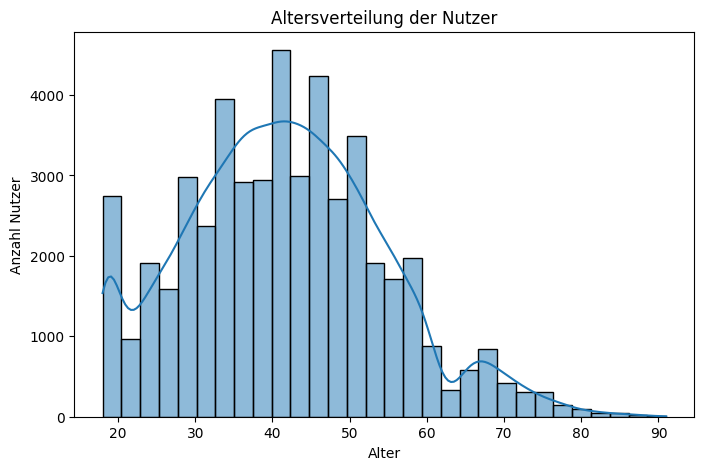

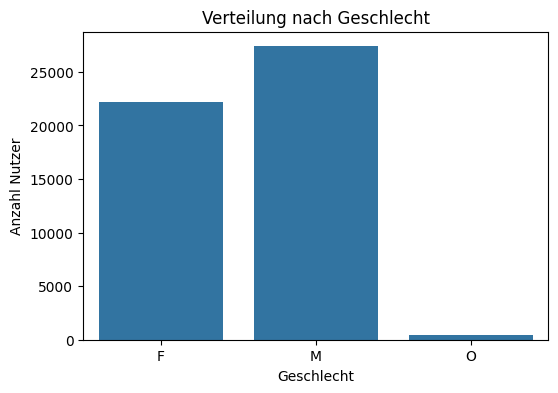

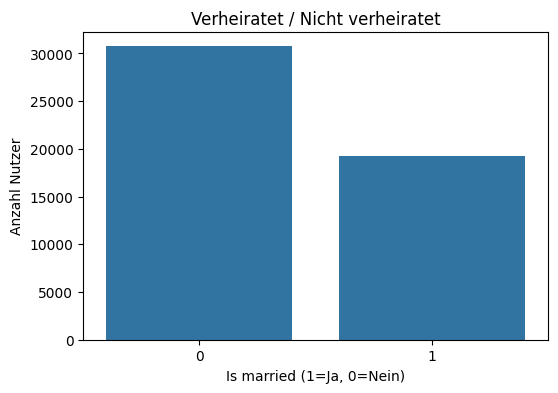

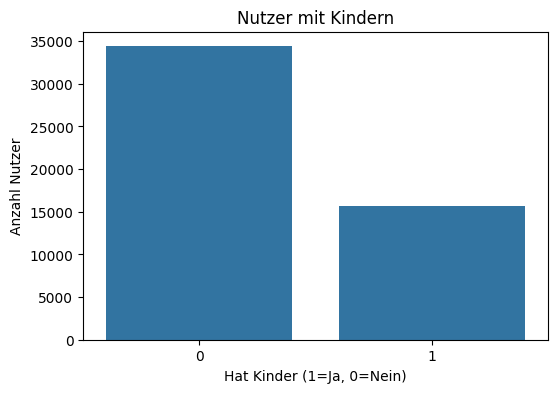

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Altershistogramm
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Altersverteilung der Nutzer')
plt.xlabel('Alter')
plt.ylabel('Anzahl Nutzer')
plt.show()

# Geschlechterverteilung
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df)
plt.title('Verteilung nach Geschlecht')
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl Nutzer')
plt.show()

# Verheiratet vs. nicht verheiratet
plt.figure(figsize=(6,4))
sns.countplot(x='is_married', data=df)
plt.title('Verheiratet / Nicht verheiratet')
plt.xlabel('Is married (1=Ja, 0=Nein)')
plt.ylabel('Anzahl Nutzer')
plt.show()

# Kinder vs. keine Kinder
plt.figure(figsize=(6,4))
sns.countplot(x='has_children', data=df)
plt.title('Nutzer mit Kindern')
plt.xlabel('Hat Kinder (1=Ja, 0=Nein)')
plt.ylabel('Anzahl Nutzer')
plt.show()


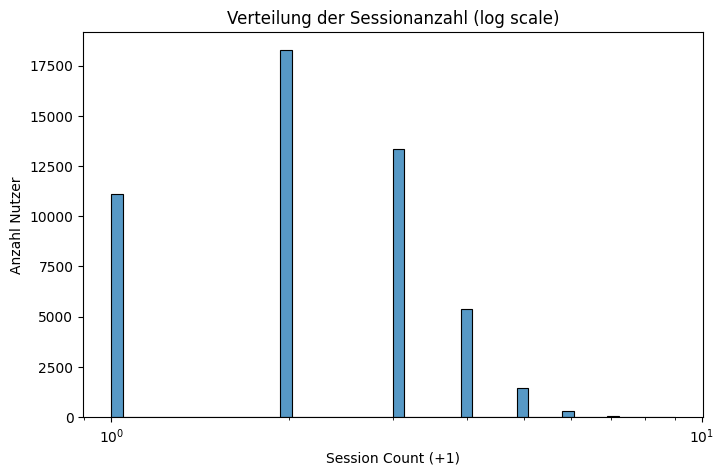

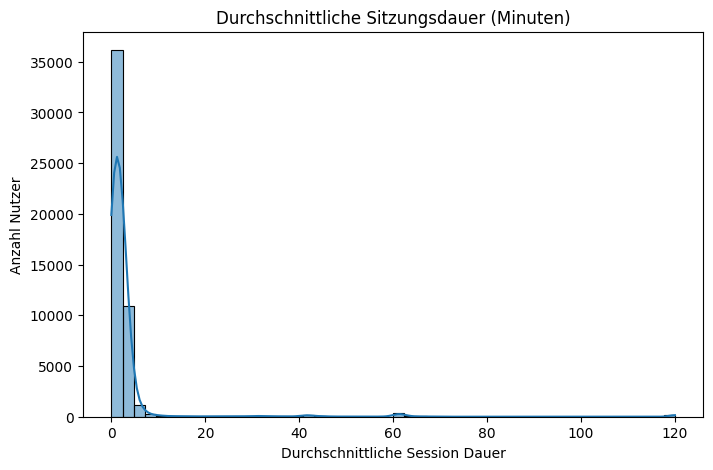

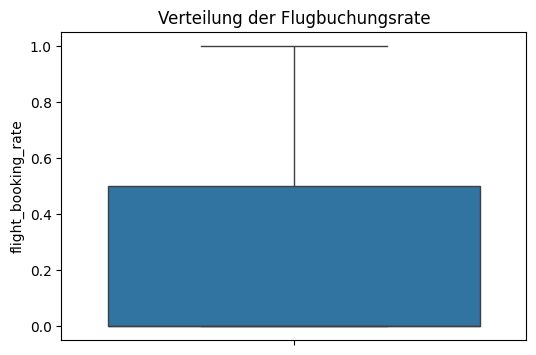

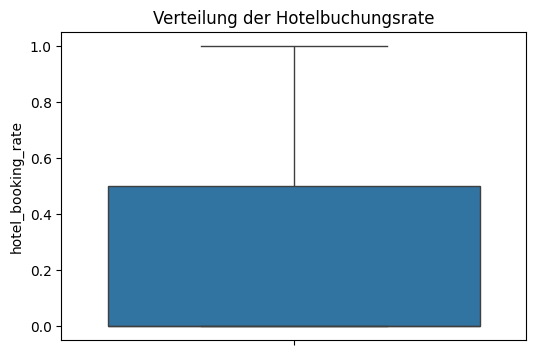

In [ ]:
# Session Count Verteilung (log scale wegen starker Streuung)
plt.figure(figsize=(8,5))
sns.histplot(df['session_count'] + 1, bins=50, log_scale=True)
plt.title('Verteilung der Sessionanzahl (log scale)')
plt.xlabel('Session Count (+1)')
plt.ylabel('Anzahl Nutzer')
plt.show()

# Durchschnittliche Sitzungsdauer
plt.figure(figsize=(8,5))
sns.histplot(df['avg_session_duration_min'], bins=50, kde=True)
plt.title('Durchschnittliche Sitzungsdauer (Minuten)')
plt.xlabel('Durchschnittliche Session Dauer')
plt.ylabel('Anzahl Nutzer')
plt.show()

# Flugbuchungsrate als Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(y='flight_booking_rate', data=df)
plt.title('Verteilung der Flugbuchungsrate')
plt.show()

# Hotelbuchungsrate als Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(y='hotel_booking_rate', data=df)
plt.title('Verteilung der Hotelbuchungsrate')
plt.show()


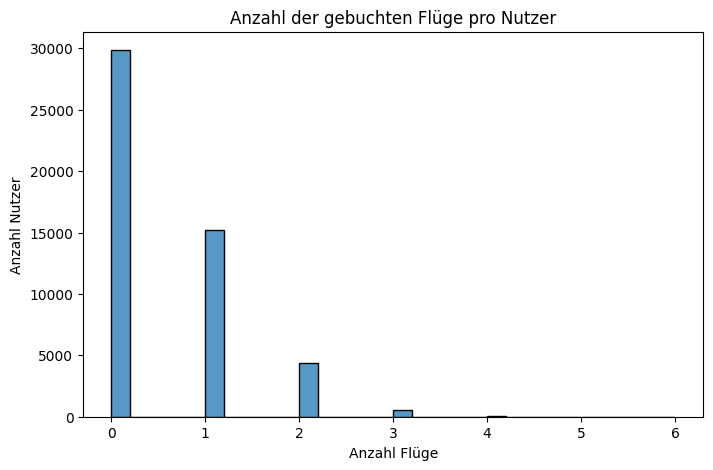

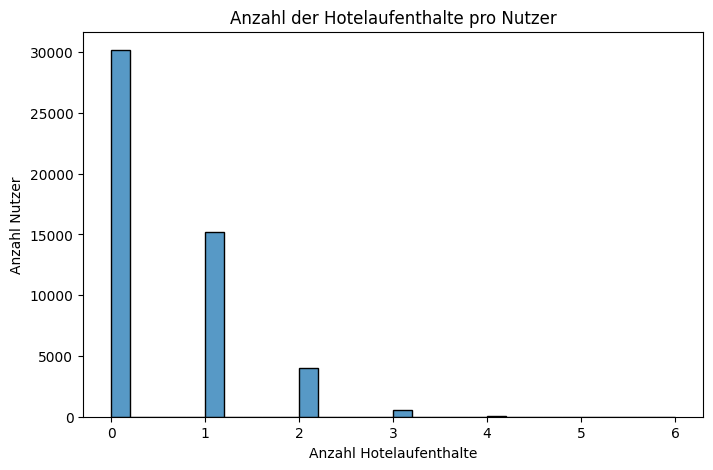

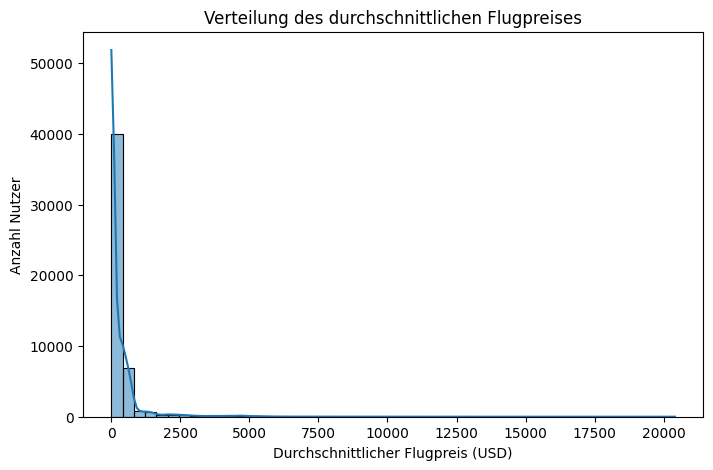

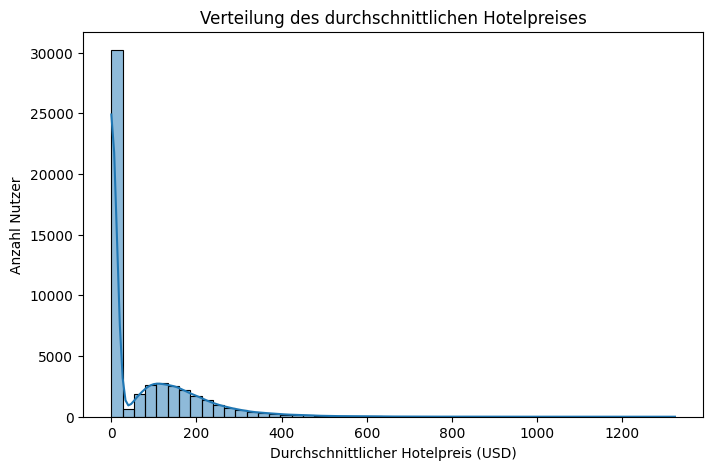

In [ ]:
# Anzahl Flüge
plt.figure(figsize=(8,5))
sns.histplot(df['num_flights'], bins=30, kde=False)
plt.title('Anzahl der gebuchten Flüge pro Nutzer')
plt.xlabel('Anzahl Flüge')
plt.ylabel('Anzahl Nutzer')
plt.show()

# Anzahl Hotelaufenthalte
plt.figure(figsize=(8,5))
sns.histplot(df['num_hotel_stays'], bins=30, kde=False)
plt.title('Anzahl der Hotelaufenthalte pro Nutzer')
plt.xlabel('Anzahl Hotelaufenthalte')
plt.ylabel('Anzahl Nutzer')
plt.show()

# Durchschnittlicher Flugpreis
plt.figure(figsize=(8,5))
sns.histplot(df['avg_base_fare'], bins=50, kde=True)
plt.title('Verteilung des durchschnittlichen Flugpreises')
plt.xlabel('Durchschnittlicher Flugpreis (USD)')
plt.ylabel('Anzahl Nutzer')
plt.show()

# Durchschnittlicher Hotelpreis
plt.figure(figsize=(8,5))
sns.histplot(df['avg_price_per_room'], bins=50, kde=True)
plt.title('Verteilung des durchschnittlichen Hotelpreises')
plt.xlabel('Durchschnittlicher Hotelpreis (USD)')
plt.ylabel('Anzahl Nutzer')
plt.show()


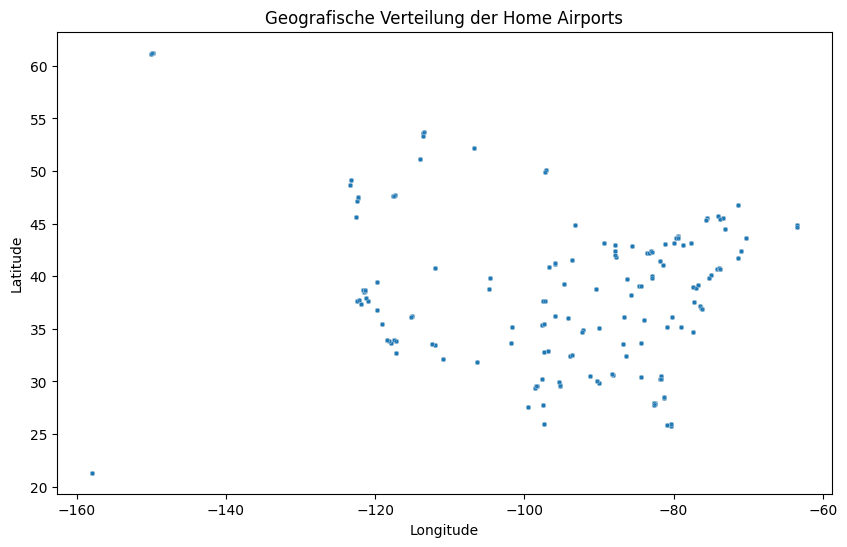

In [ ]:
# Geografische Verteilung
plt.figure(figsize=(10,6))
sns.scatterplot(x='home_airport_lon', y='home_airport_lat', data=df, alpha=0.5, s=10)
plt.title('Geografische Verteilung der Home Airports')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


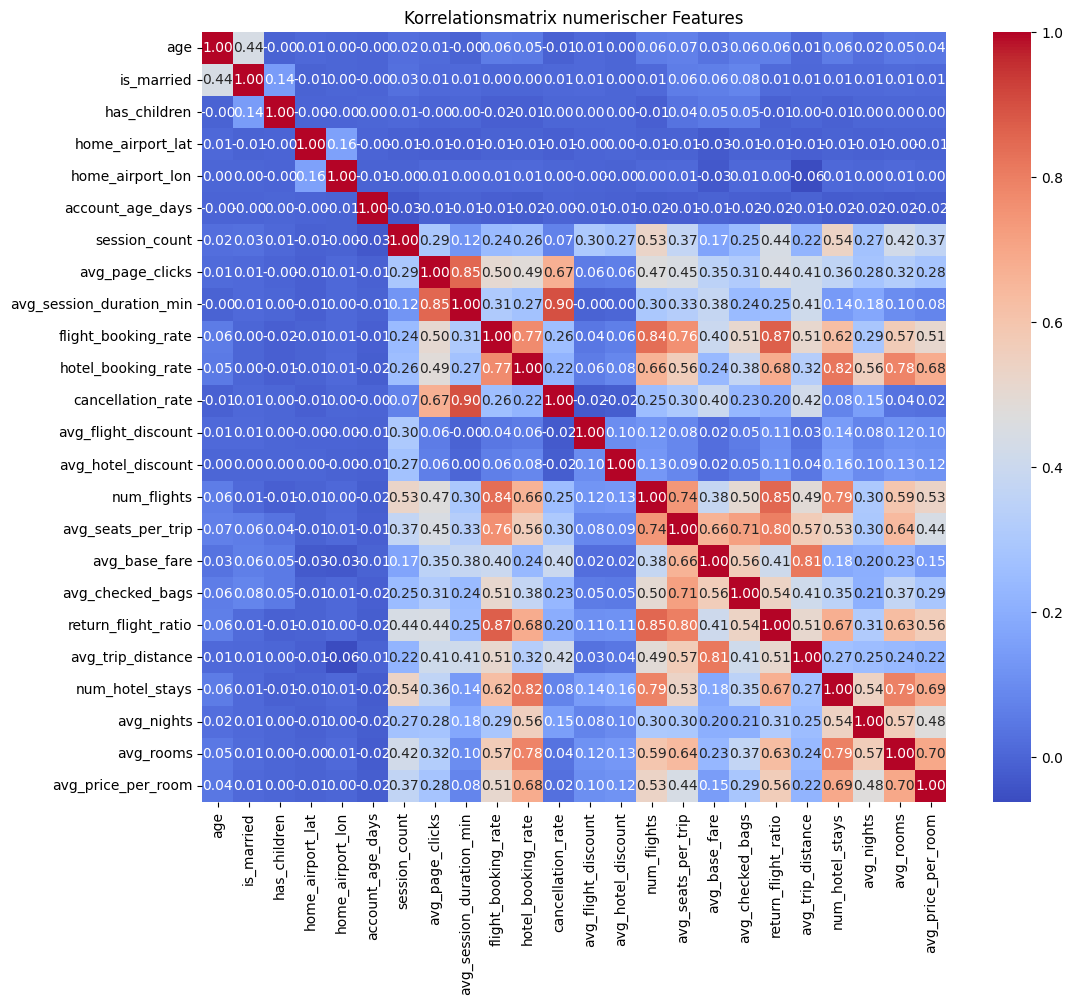

In [ ]:
# Korrelationsmatrix
plt.figure(figsize=(12,10))
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('user_id')
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Korrelationsmatrix numerischer Features')
plt.show()


# 4.0 Feature Engineering, Encoding & Skalierung vor dem Clustering

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

# 1. 'gender' Label-Encodieren (F → 0, M → 1)
df['gender'] = LabelEncoder().fit_transform(df['gender'])

# 2. 'home_country' binär encodieren: USA → 0, Canada → 1
df['home_country'] = df['home_country'].apply(lambda x: 1 if x.strip().lower() == 'canada' else 0)

# 3. Drope unbrauchbare Spalten
df_cluster = df.drop(columns=['user_id', 'home_city'])  # 'home_city' ist zu granular

# 4. Imputation (fehlende Werte)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(df_cluster)

# 5. Standardisierung
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 4.1 PCA

In [ ]:
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)
pca_vis = PCA(n_components=2, random_state=42)
X_pca_vis = pca_vis.fit_transform(X_scaled)

print(f"PCA reduzierte auf {X_pca.shape[1]} Komponenten")


PCA reduzierte auf 18 Komponenten


# 4.2 Elbow and Silhouette Analysis

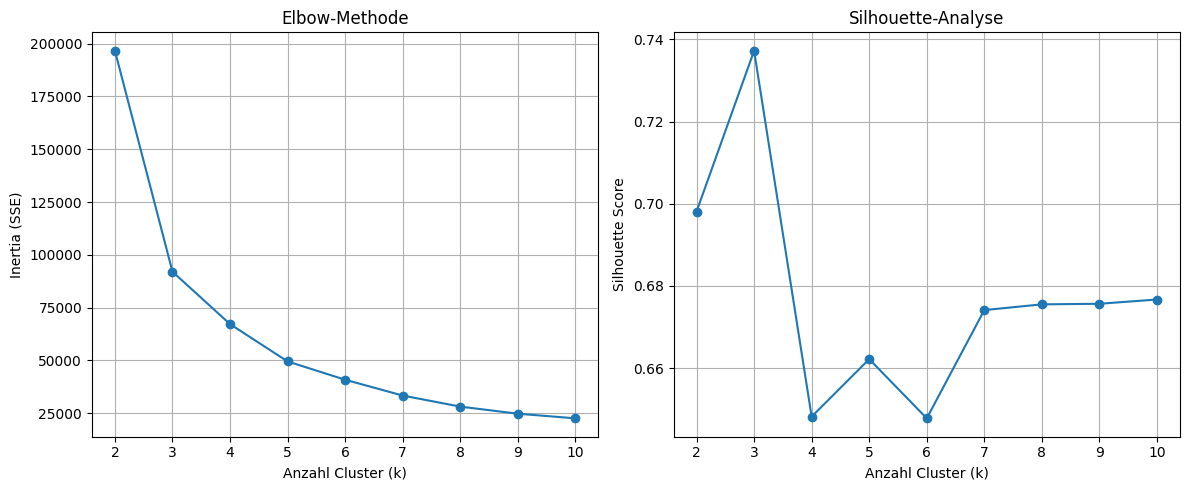

In [ ]:
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
k_values = range(2, 11)

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X_pca_vis)
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(X_pca_vis, labels))

# Plot Elbow
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow-Methode')
plt.xlabel('Anzahl Cluster (k)')
plt.ylabel('Inertia (SSE)')
plt.grid(True)

# Plot Silhouette
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette, marker='o')
plt.title('Silhouette-Analyse')
plt.xlabel('Anzahl Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()


# 5.0 Unsupervised Learning - KMeans

In [ ]:
# Anzahl Cluster: hier z.B. 4 (du kannst das anpassen)
n_clusters = 4

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

In [ ]:
# 9. Cluster zum DataFrame hinzufügen
df['cluster_kmeans_4'] = cluster_labels

# 10. Ausgabe & Speichern
print(df['cluster_kmeans_4'].value_counts())
print(df[['user_id', 'cluster_kmeans_4']].head())

cluster_kmeans_4
1    27491
2    18152
0     3024
3     1333
Name: count, dtype: int64
   user_id  cluster_kmeans_4
0        0                 2
1        1                 1
2        2                 1
3        3                 1
4        4                 2


# 5.1 Visualisierung

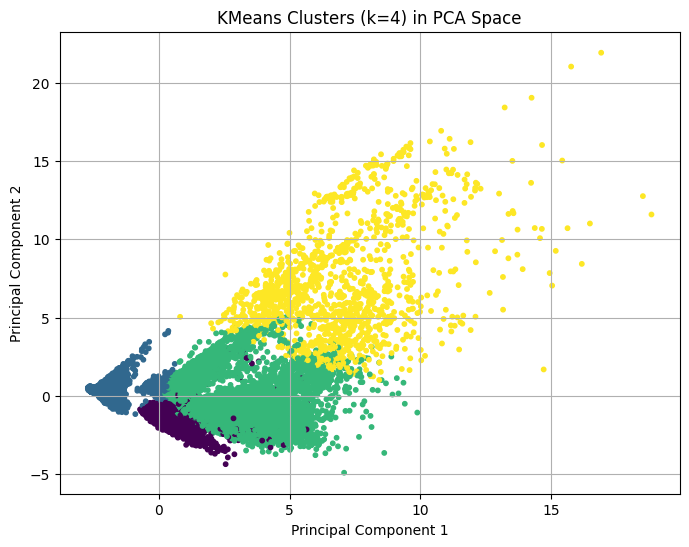

{np.int32(0): np.int64(3024),
 np.int32(1): np.int64(27491),
 np.int32(2): np.int64(18152),
 np.int32(3): np.int64(1333)}

In [ ]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_vis[:, 0], X_pca_vis[:, 1], c=cluster_labels, s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters (k=4) in PCA Space')
plt.grid(True)
plt.show()

# Clusterverteilung anzeigen
unique, counts = np.unique(cluster_labels, return_counts=True)
dict(zip(unique, counts))

In [ ]:
#Speichern als CSV
df.to_csv("unsupervised_with_4clusters_pca.csv", index=False)

# 6.0 Nearest Neighbor für DBSCAN

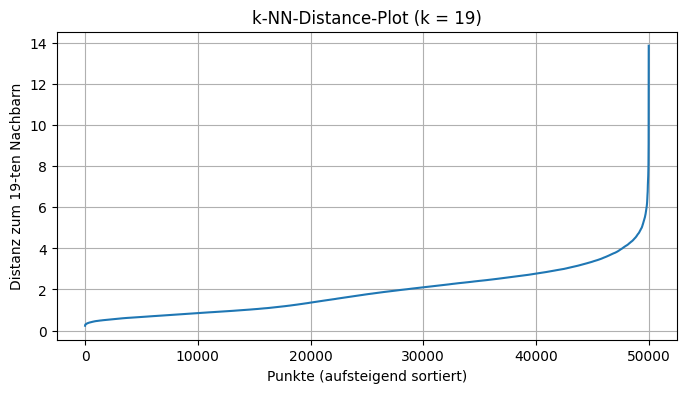

In [ ]:
from sklearn.neighbors import NearestNeighbors

# --- Parameter ---
min_samples = X_pca.shape[1] + 1          # Dimension + 1  (Faustregel)

# --- k-NN-Distanzen berechnen ---
nbrs       = NearestNeighbors(n_neighbors=min_samples)
nbrs_fit   = nbrs.fit(X_pca)
distances, _ = nbrs_fit.kneighbors(X_pca)

# Distanz zum min_samples-ten Nachbarn, sortiert
k_distances = np.sort(distances[:, -1])

# --- Plot ---
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.title(f'k-NN-Distance-Plot (k = {min_samples})')
plt.xlabel('Punkte (aufsteigend sortiert)')
plt.ylabel(f'Distanz zum {min_samples}-ten Nachbarn')
plt.grid(True)
plt.show()

# 6.1 Unsupervised Learning - DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Hyper­parameter
eps         = 4.0
min_samples = 20

# DBSCAN
dbscan       = DBSCAN(eps=eps, min_samples=min_samples)
db_labels    = dbscan.fit_predict(X_pca)

# Ergebnisse
n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise    = int(np.sum(db_labels == -1))

print(f'Cluster gefunden (ohne Noise): {n_clusters}')
print(f'Noise-Punkte: {n_noise}')

# zum DataFrame hinzufügen
df['dbscan_cluster'] = db_labels



Cluster gefunden (ohne Noise): 3
Noise-Punkte: 920


# 6.2 DBSCAN Visualisierung

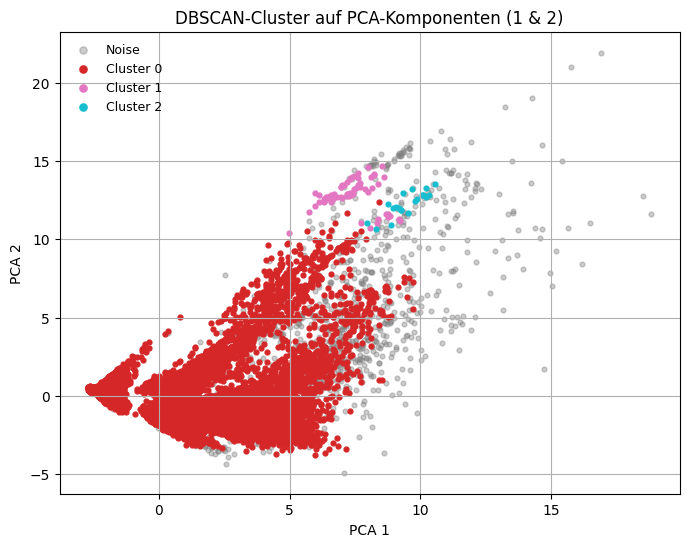

In [ ]:
# Farben per Cluster-ID (Noise = -1 → grau)
unique_labels = np.unique(db_labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
color_map = {label: col for label, col in zip(unique_labels, colors)}
color_map[-1] = (0.5, 0.5, 0.5, 0.4)   # Noise in grau

plt.figure(figsize=(8, 6))
for lbl in unique_labels:
    mask = db_labels == lbl
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        s=12,
        c=[color_map[lbl]],
        label=f'Cluster {lbl}' if lbl != -1 else 'Noise'
    )

plt.title('DBSCAN-Cluster auf PCA-Komponenten (1 & 2)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(markerscale=1.5, fontsize=9, frameon=False)
plt.grid(True)
plt.show()



# Fazit: Unsupervised Learning & Kundensegmentierung

Für das Clustering der Nutzerdaten wurde das KMeans-Modell verwendet. Nach Vorverarbeitung, Feature-Engineering und Dimensionsreduktion mit PCA ergab sich eine sinnvolle Segmentierung in 4 Kundengruppen.

Diese Segmente wurden erfolgreich als zusätzliche Features für ein anschließendes Supervised Learning Modell übernommen und stärken dort die Vorhersagekraft.

Darüber hinaus bietet das Modell einen praktischen Mehrwert für unternehmerische Zwecke:
Die Cluster lassen sich analysieren, um typische Kundentypen zu identifizieren – z. B. Vielbucher, Schnäppchenjäger, inaktive Nutzer oder Familienkunden.
Solche Erkenntnisse können in Marketing, Personalisierung, Preisstrategien oder Kundenbindung einfließen.